### Importing Libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(2017)
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Dropout, Input
from keras.models import Model
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from IPython.display import SVG
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import model_to_dot, plot_model

Using TensorFlow backend.
D:\DS\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\DS\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\DS\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\DS\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is de

### Loading Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Checkout the data

In [3]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


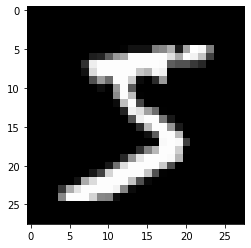

In [5]:
# Display the first image in training data
plt.imshow(X_train[0], cmap='gray')

In [6]:
test_data=X_test

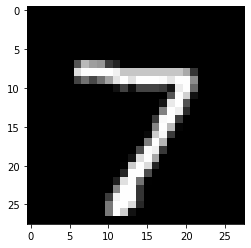

In [7]:
# Display the first image in testing data
plt.imshow(X_test[0], cmap='gray')

### Processing data

In [8]:
nb_classes = 10 # class size
# flatten 28*28 images to a 784 vector for each image
input_unit_size = 28*28
epochs = 5

In [9]:
X_train = X_train.reshape(X_train.shape[0], input_unit_size)
X_test = X_test.reshape(X_test.shape[0], input_unit_size)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
# Scale the values by dividing 255 i.e., means foreground (black)
X_train /= 255
X_test /= 255

In [11]:
# one-hot representation, required for multiclass problems
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 784)
60000 train samples
10000 test samples


### Modelling

In [12]:
# create model
model = Sequential()
model.add(Dense(input_unit_size, input_dim=input_unit_size, kernel_initializer='normal',activation='relu'))
model.add(Dense(nb_classes, kernel_initializer='normal', activation='softmax'))


In [13]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [14]:
# model training
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=500, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 4s - loss: 0.3863 - accuracy: 0.8925 - val_loss: 0.1874 - val_accuracy: 0.9478
Epoch 2/5
 - 4s - loss: 0.1559 - accuracy: 0.9561 - val_loss: 0.1280 - val_accuracy: 0.9618
Epoch 3/5
 - 4s - loss: 0.1072 - accuracy: 0.9696 - val_loss: 0.1013 - val_accuracy: 0.9698
Epoch 4/5
 - 3s - loss: 0.0800 - accuracy: 0.9774 - val_loss: 0.0847 - val_accuracy: 0.9751
Epoch 5/5
 - 4s - loss: 0.0607 - accuracy: 0.9832 - val_loss: 0.0760 - val_accuracy: 0.9772


### Evaluation

In [15]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

In [16]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.07599102362683043
Test accuracy: 0.9771999716758728


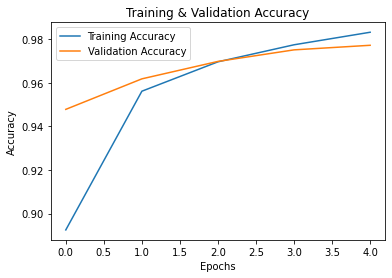

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'], loc = 'upper left')
plt.show()

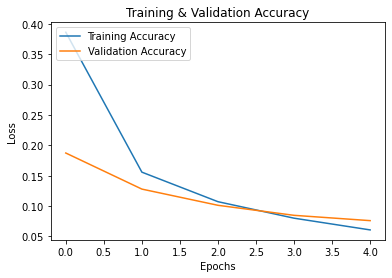

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training & Validation Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'], loc = 'upper left')
plt.show()

#### Initially validation loss decreasing but then increasing gradually. There is a substantial difference between 
#### training and validation accuracy. It shows overfitting. To overcome that we are doing regularization by adding dropout layer.

### Regularization

In [19]:
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_dim=input_unit_size))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nb_classes, activation='softmax'))

In [20]:
model_reg.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [21]:
history=model_reg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=500, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 6s - loss: 0.4883 - accuracy: 0.8488 - val_loss: 0.1625 - val_accuracy: 0.9509
Epoch 2/5
 - 5s - loss: 0.1930 - accuracy: 0.9427 - val_loss: 0.1120 - val_accuracy: 0.9648
Epoch 3/5
 - 5s - loss: 0.1485 - accuracy: 0.9554 - val_loss: 0.0948 - val_accuracy: 0.9687
Epoch 4/5
 - 5s - loss: 0.1175 - accuracy: 0.9642 - val_loss: 0.0794 - val_accuracy: 0.9745
Epoch 5/5
 - 6s - loss: 0.1033 - accuracy: 0.9669 - val_loss: 0.0752 - val_accuracy: 0.9771


### Evaluation

In [22]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [23]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.07599102362683043
Test accuracy: 0.9771999716758728


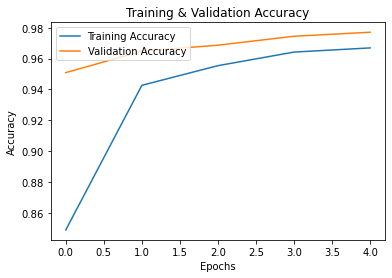

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'], loc = 'upper left')
plt.show()

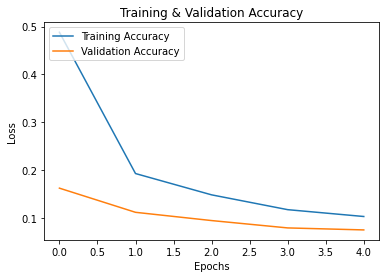

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training & Validation Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'], loc = 'upper left')
plt.show()

#### Validation loss is not increasing and difference between training and validation accuracy is not very high.

### Prediction

Model prediction: 2


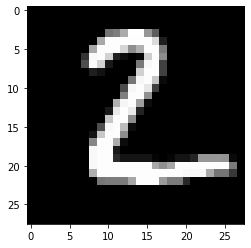

In [26]:
print("Model prediction: {}".format(model_reg.predict_classes(X_test[[1],:])[0]))
plt.imshow(test_data[1], cmap='gray')

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
